In [ ]:
#parameter 
mesh_sizes = [100]

In [39]:
pip install ospgrillage

In [38]:
from sectionproperties.pre.library.steel_sections import mono_i_section
from sectionproperties.analysis.section import Section
from sectionproperties.pre.library.steel_sections import mono_i_section
import sectionproperties.pre.library.primitive_sections as sections
import sectionproperties.pre.library.steel_sections as steel_sections
from sectionproperties.pre.geometry import CompoundGeometry
from sectionproperties.pre.pre import Material
from sectionproperties.analysis.section import Section

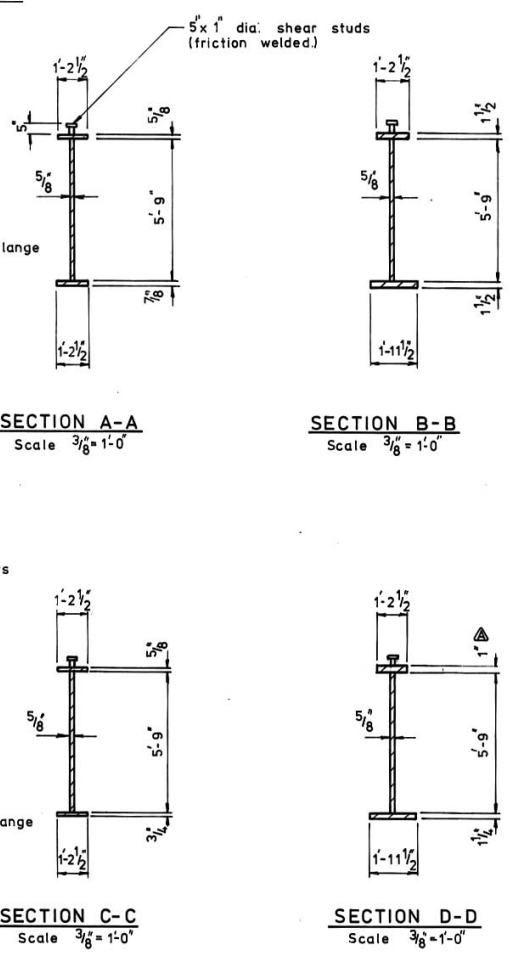

In [4]:
#display longitudinal section dimension 
from IPython.display import Image
Image(filename =r'C:\Users\DARA\Desktop\4th year\fyp\L1.PNG', width= 200)

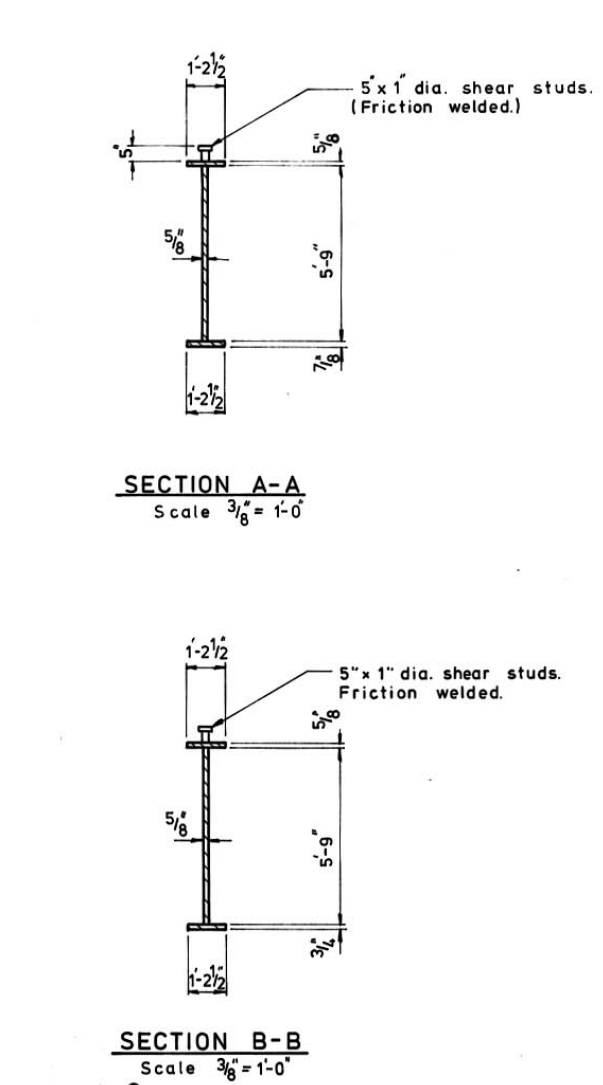

In [5]:
Image(filename =r'C:\Users\DARA\Desktop\4th year\fyp\LongB.PNG', width = 200)

<IPython.core.display.Javascript object>


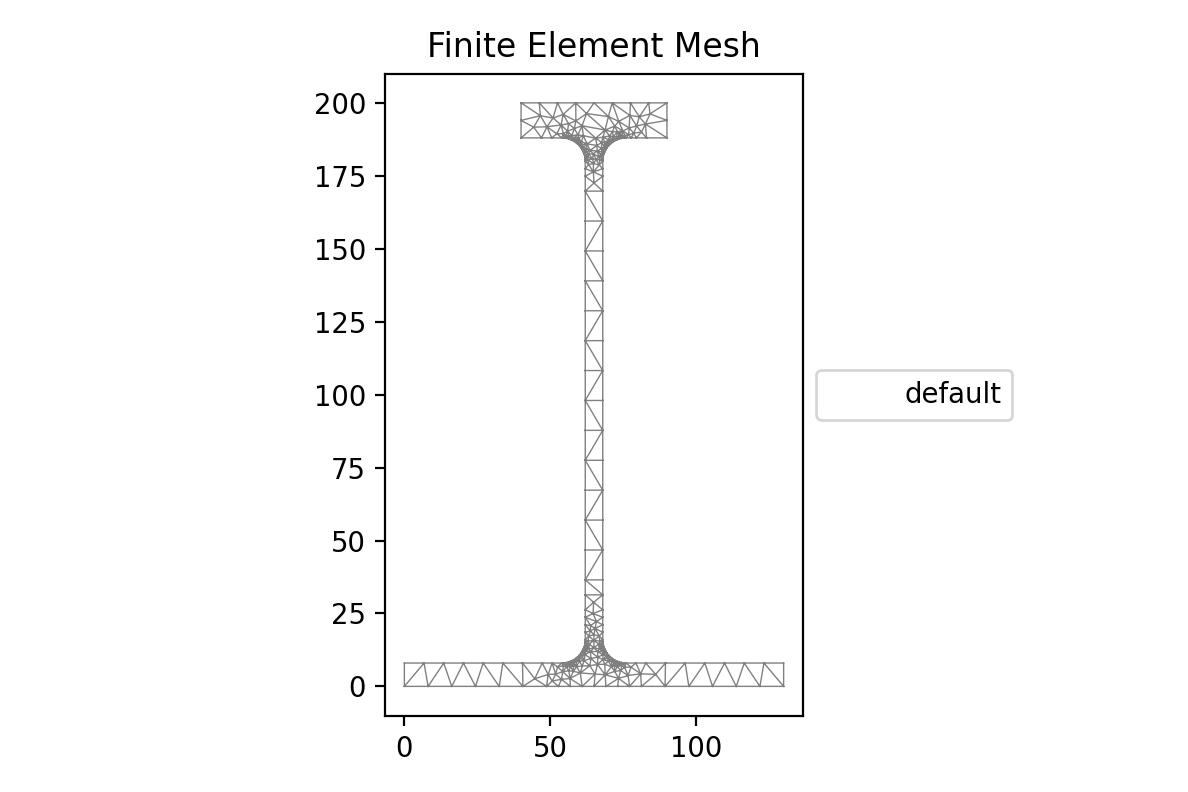

Mesh Statistics:
--1122 nodes
--479 elements
--1 region



In [4]:
#Longitudinal member 
geometryA1 = mono_i_section(
    d=200, b_t=50, b_b=130, t_ft=12, t_fb=8, t_w=6, r=8, n_r=16
)
geometryA1.create_mesh(mesh_sizes)
LongitudinalA1 = Section(geometryA1)
LongitudinalA1.plot_mesh()
#section = Section(geometry)
LongitudinalA1.display_mesh_info()


In [5]:
LongitudinalA1.calculate_geometric_properties()
LongitudinalA1.display_results(fmt='.3f')

Section Properties:
A	 = 2775.305
Perim.	 = 734.243
Qx	 = 231819.924
Qy	 = 180394.848
cx	 = 65.000
cy	 = 83.530
Ixx_g	 = 36860873.836
Iyy_g	 = 13319969.332
Ixy_g	 = 15068295.083
Ixx_c	 = 17497066.781
Iyy_c	 = 1594304.226
Ixy_c	 = -0.000
Zxx+	 = 150227.481
Zxx-	 = 209471.654
Zyy+	 = 24527.757
Zyy-	 = 24527.757
rx	 = 79.401
ry	 = 23.968
phi	 = 0.000
I11_c	 = 17497066.781
I22_c	 = 1594304.226
Z11+	 = 150227.481
Z11-	 = 209471.654
Z22+	 = 24527.757
Z22-	 = 24527.757
r11	 = 79.401
r22	 = 23.968



In [6]:
geometryA2 = mono_i_section(
    d=1752.6, b_t=368.3, b_b=596.9, t_ft=38.1, t_fb=38.1, t_w=15.875, r=0, n_r=0
)
geometryA2.create_mesh(mesh_sizes)
LogitudinalA2 = Section(geometryA2)
(area, ixx, iyy, ixy, j, phi) = LogitudinalA2.calculate_frame_properties()

In [7]:
geometryA3 = mono_i_section(
    d=1752.6, b_t=368.3, b_b=368.3, t_ft=15.875, t_fb=19.05, t_w=15.875, r=0, n_r=0
)
geometryA3.create_mesh(mesh_sizes)
LogitudinalA3 = Section(geometryA3)
(area, ixx, iyy, ixy, j, phi) = LogitudinalA3.calculate_frame_properties()

In [8]:
geometryA4 = mono_i_section(
    d=1752.6, b_t=368.3, b_b=596.9, t_ft=25.4, t_fb=31.75, t_w=15.875, r=0, n_r=0
)
geometryA4.create_mesh(mesh_sizes)
LogitudinalA4 = Section(geometryA4)
(area, ixx, iyy, ixy, j, phi) = LogitudinalA4.calculate_frame_properties()

In [9]:
#beamB1 = beamB2
geometryB1= mono_i_section(
    d=1752.6, b_t=368.3, b_b=368.3, t_ft=15.875, t_fb=22.225, t_w=15.875, r=0, n_r=0
)
geometryB1.create_mesh(mesh_sizes)
LogitudinalB1 = Section(geometryB1)
(area, ixx, iyy, ixy, j, phi) = LogitudinalB1.calculate_frame_properties()

In [ ]:
#beamB3 = beamB4
geometryB3= mono_i_section(
    d=1752.6, b_t=368.3, b_b=368.3, t_ft=15.875, t_fb=19.05, t_w=15.875, r=0, n_r=0
)
geometryB3.create_mesh(mesh_sizes)
LogitudinalB3 = Section(geometryB3)
(area, ixx, iyy, ixy, j, phi) = LogitudinalB3.calculate_frame_properties()

In [10]:
#logitudinal edge beam


In [26]:
#transerverse Slab
from sectionproperties.pre.library.primitive_sections import rectangular_section
transverse_slab = rectangular_section(d=190, b=900)
transverse_slab.create_mesh(mesh_sizes=[mesh_sizes])
Transverse_slab = Section(transverse_slab)
(Tran_slab_area,Tran_slab_ixx, Tran_slab_iyy,Tran_slab_ixy,Tran_slab_j, phi) = Transverse_slab.calculate_frame_properties()

In [28]:
#end transerverse slab
end_slab = rectangular_section(d=190, b=900/2)
end_slab.create_mesh(mesh_sizes=[mesh_sizes])
End_slab = Section(end_slab)
(End_slab_area,End_slab_ixx, End_slab_iyy,End_slab_ixy,End_slab_j, phi) = End_slab.calculate_frame_properties()

In [12]:
steel = Material(
    name="Steel",
    elastic_modulus=200e3,
    poissons_ratio=0.3,
    yield_strength=500,
    density=8.05e-6,
    color="grey",
)
concrete = Material(
    name="concrete",
    elastic_modulus=30e3,
    poissons_ratio=0.2,
    yield_strength=350,
    density=2.4e-6,
    color="burlywood",
)

In [13]:
I_beam = mono_i_section(
    d=1752.6, b_t=368.3, b_b=596.9, t_ft=38.1, t_fb=38.1, t_w=15.875, r=0, n_r=0
)

In [14]:
panel = sections.rectangular_section(d=190, b=1000, material=concrete)
panel = panel.align_center(I_beam).align_to(I_beam, on="top")
# Create intermediate nodes in panel to match nodes in ub
panel = (panel - I_beam) | panel

In [15]:
section_geometry = CompoundGeometry([I_beam, panel])

In [16]:
section_geometry.create_mesh(mesh_sizes=[30, 30])
comp_section = Section(section_geometry, time_info=True)
comp_section.display_mesh_info()  # display the mesh information

--Initialising the Section class...
----completed in 0.192485 seconds---

Mesh Statistics:
--28285 nodes
--13646 elements
--2 regions



<IPython.core.display.Javascript object>


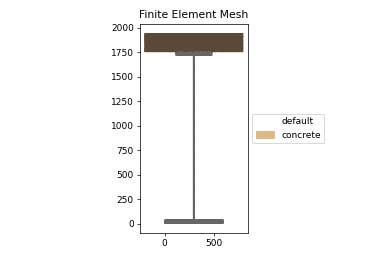

<AxesSubplot:title={'center':'Finite Element Mesh'}>

In [20]:
comp_section.plot_mesh(materials=True, alpha=0.6)

In [30]:
#comp_section.calculate_geometric_properties()

(comp_section_area, comp_section_ixx, comp_section_iyy,comp_section_ixy,comp_section_j,phi) = comp_section.calculate_frame_properties()

print(comp_section_area)

--Calculating frame section properties...
--Initialising the Section class...
----completed in 0.157576 seconds---

----completed in 76.074462 seconds---

5700063386.969983


In [22]:
print(comp_section_ixx)

17255065545516.0


No Model_ODB specified, trying to get data from the active model.
3D model


<IPython.core.display.Javascript object>


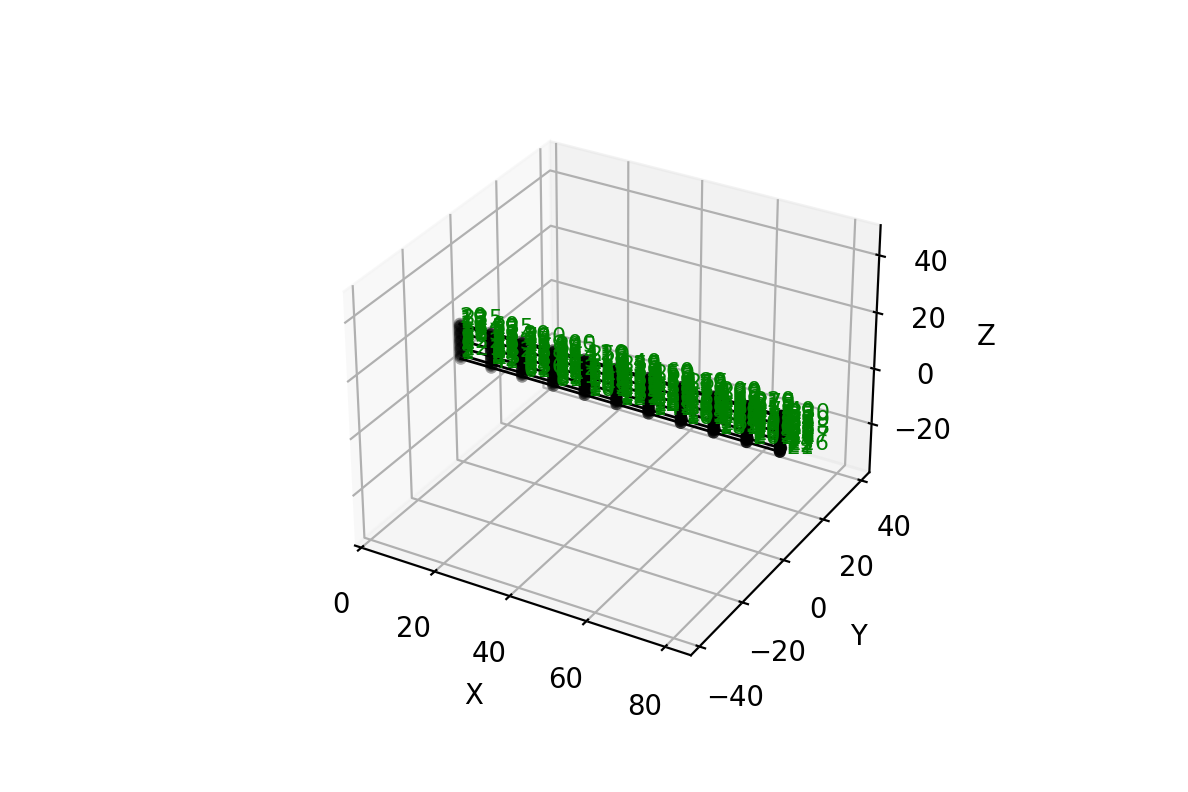

Lxyz: [0.     0.     0.6775], L: 0.6775
Lxyz: [0.    0.    0.445], L: 0.44500000000000006
Lxyz: [0.         0.         0.74333333], L: 0.7433333333333332
Lxyz: [0.         0.         0.74333333], L: 0.7433333333333332
Lxyz: [0.         0.         0.74333333], L: 0.7433333333333332
Lxyz: [0.    0.    0.445], L: 0.4450000000000003
Lxyz: [0.         0.         0.74333333], L: 0.7433333333333336
Lxyz: [0.         0.         0.74333333], L: 0.7433333333333332
Lxyz: [0.         0.         0.74333333], L: 0.7433333333333332
Lxyz: [0.    0.    0.445], L: 0.4450000000000003
Lxyz: [0.         0.         0.74333333], L: 0.7433333333333332
Lxyz: [0.         0.         0.74333333], L: 0.7433333333333323
Lxyz: [0.         0.         0.74333333], L: 0.7433333333333332
Lxyz: [0.    0.    0.445], L: 0.4450000000000003
Lxyz: [0.         0.         0.74333333], L: 0.7433333333333341
Lxyz: [0.         0.         0.74333333], L: 0.7433333333333323
Lxyz: [0.         0.         0.74333333], L: 0.743333333333

Lxyz: [8.47 0.   0.  ], L: 8.469999999999999
Lxyz: [0.     0.     0.6775], L: 0.6775
Lxyz: [0.    0.    0.445], L: 0.44500000000000006
Lxyz: [0.         0.         0.74333333], L: 0.7433333333333332
Lxyz: [0.         0.         0.74333333], L: 0.7433333333333332
Lxyz: [0.         0.         0.74333333], L: 0.7433333333333332
Lxyz: [0.    0.    0.445], L: 0.4450000000000003
Lxyz: [0.         0.         0.74333333], L: 0.7433333333333336
Lxyz: [0.         0.         0.74333333], L: 0.7433333333333332
Lxyz: [0.         0.         0.74333333], L: 0.7433333333333332
Lxyz: [0.    0.    0.445], L: 0.4450000000000003
Lxyz: [0.         0.         0.74333333], L: 0.7433333333333332
Lxyz: [0.         0.         0.74333333], L: 0.7433333333333323
Lxyz: [0.         0.         0.74333333], L: 0.7433333333333332
Lxyz: [0.    0.    0.445], L: 0.4450000000000003
Lxyz: [0.         0.         0.74333333], L: 0.7433333333333341
Lxyz: [0.         0.         0.74333333], L: 0.7433333333333323
Lxyz: [0.     

<IPython.core.display.Javascript object>


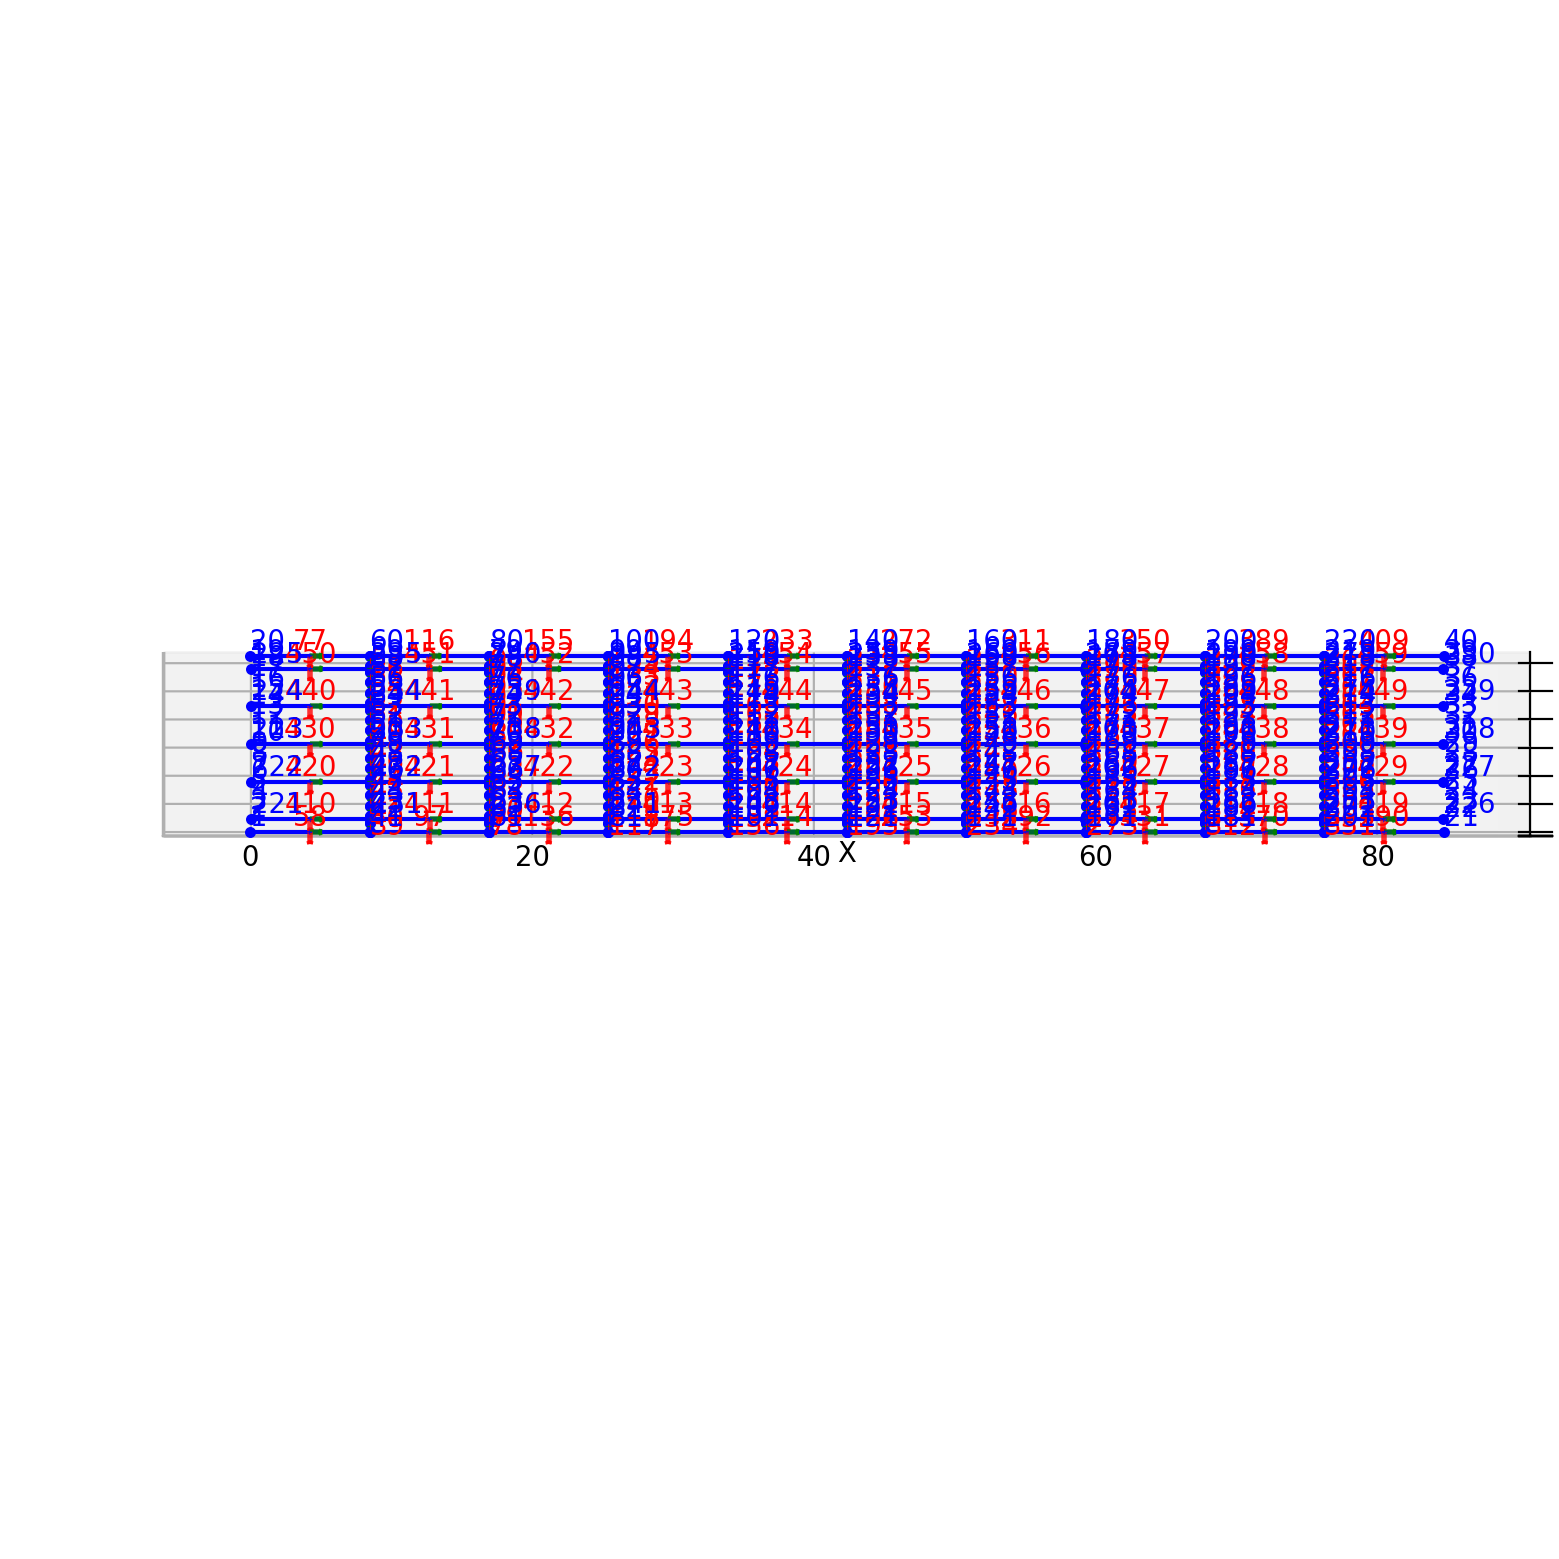

In [59]:
import numpy as np
import ospgrillage as og

# Adopted units: N and m
kilo = 1e3
milli = 1e-3
N = 1
m = 1
mm = milli * m
m2 = m ** 2
m3 = m ** 3
m4 = m ** 4
kN = kilo * N
MPa = N / ((mm) ** 2)
GPa = kilo * MPa

# define material
concrete = og.create_material(material="concrete", code="AS5100-2017", grade="65MPa")

# define sections (parameters from section property calculation)
edge_longitudinal_section = og.create_section(
    A=0.934 * m2,
    J=0.1857 * m3,
    Iz=0.3478 * m4,
    Iy=0.213602 * m4,
    Az=0.444795 * m2,
    Ay=0.258704 * m2,
)

longitudinal_section = og.create_section(
    A= comp_section_area*10**-6 * m2,
    J= comp_section_j*10**-9 * m3,
    Iz = comp_section_ixx*10**-12 * m4,
    Iy= comp_section_iyy*10**-12* m4,
    Az= comp_section_area*10**-6 * m2,
    Ay= comp_section_area*10**-6 * m2,
)

transverse_section = og.create_section(
    A= Tran_slab_area*10**-6 * m2,
    J= Tran_slab_j*10**-9* m3,
    Iy= Tran_slab_iyy*10**-12* m4,
    Iz= Tran_slab_ixx*10**-12* m4,
    Ay= Tran_slab_area*10**-6* m2,
    Az= Tran_slab_area*10**-6* m2,
)

end_transverse_section = og.create_section(
    A=End_slab_area*10**-6 * m2,
    J= End_slab_j*10**-9 * m3,
    Iy=End_slab_iyy*10**-12 * m4,
    Iz=End_slab_ixx*10**-12 * m4,
    Ay=End_slab_area*10**-6 * m2,
    Az=End_slab_area*10**-6 * m2,
)

# define grillage members
longitudinal_beam = og.create_member(section=longitudinal_section, material=concrete)
edge_longitudinal_beam = og.create_member(
    section=edge_longitudinal_section, material=concrete
)
transverse_slab = og.create_member(section=transverse_section, material=concrete)
end_transverse_slab = og.create_member(
    section=end_transverse_section, material=concrete
)


# parameters of bridge grillage
L = 84.7 * m  # span
w = 12.5 * m  # width
n_l = 7  # number of longitudinal members
n_t = 11  # number of transverse members
edge_dist = 0.9 * m  # distance between edge beam and first exterior beam
angle = 0  # skew angle
offset_beam_y = 0.499 * m
max_mesh_size_z = 1 * m
max_mesh_size_x = 1 * m
link_nodes_width = 0.89 * m
transverse_spacing = [6.09, 6.09,6.09,6.83,6.89,6.9,5.9,6.9,6.92,6.8,6.09,6.09,6.09]
# create grillage
simple_grid = og.create_grillage(
    bridge_name="Banksia st",
    long_dim=L,
    width=w,
    skew=angle,
    num_long_grid=n_l,
    num_trans_grid=n_t,
    edge_beam_dist=edge_dist,
    model_type="shell_beam",
    max_mesh_size_z=max_mesh_size_z,
    max_mesh_size_x=max_mesh_size_x,
    offset_beam_y_dist=offset_beam_y,
    link_nodes_width=link_nodes_width,
    beam_width = 0.445 ,
    beam_x_spacing = transverse_spacing
)

# assign grillage member to element groups of grillage model
simple_grid.set_member(longitudinal_beam, member="interior_main_beam")
simple_grid.set_member(longitudinal_beam, member="exterior_main_beam_1")
simple_grid.set_member(longitudinal_beam, member="exterior_main_beam_2")
simple_grid.set_member(edge_longitudinal_beam, member="edge_beam")
simple_grid.set_member(transverse_slab, member="transverse_slab")
#simple_grid.set_member(end_transverse_slab, member="start_edge")
#simple_grid.set_member(end_transverse_slab, member="end_edge")

# create the model in OpenSees
simple_grid.create_osp_model(
    pyfile=False
)  # pyfile will not (False) be generated for further analysis (should be create_osp?)
og.opsplt.plot_model("nodes")  # plotting using Get_rendering
og.opsv.plot_model(az_el=(-90, 0),fig_wi_he=(20., 20.))  # plotting using ops_vis
og.plt.show()

In [60]:
#Loading (loadcase 1)
# reference unit load for various load types
P = 1 * kN
# name strings of load cases to be created
static_cases_names = [
    "Line Test Case",
    "Points Test Case (Global)",
    "Points Test Case (Local in Point)",
    "Patch Test Case",
]

# Line load running along midspan width (P is kN/m)
# Create vertical load points in global coordinate system
line_point_1 = og.create_load_vertex(x=L / 2, z=0, p=P)
line_point_2 = og.create_load_vertex(x=L / 2, z=w, p=P)
test_line_load = og.create_load(
    loadtype="line", name="Test Load", point1=line_point_1, point2=line_point_2
)

# Create load case, add loads, and assign
line_case = og.create_load_case(name=static_cases_names[0])
line_case.add_load(test_line_load)

simple_grid.add_load_case(line_case)

In [61]:
# Compound point loads along midspan width (P is kN)
# working in global coordinate system
p_list = [
    0,
    edge_dist,
    edge_dist + 2 * m,
    edge_dist + 4 * m,
    edge_dist + 6 * m,
    w - edge_dist,
    w,
]  # creating list of load position

test_points_load = og.create_compound_load(name="Points Test Case (Global)")

# create point load in global coordinate
for p in p_list:
    point = og.create_load(
        loadtype="point", name="Point", point1=og.create_load_vertex(x=L / 2, z=p, p=P)
    )
    # add to compound load
    test_points_load.add_load(load_obj=point)

# Create load case, add loads, and assign
points_case = og.create_load_case(name=static_cases_names[1])
points_case.add_load(test_points_load)

simple_grid.add_load_case(points_case)

In [62]:
# Compound point loads along midspan width
# working in user-defined local coordinate (in point load)
test_points_load = og.create_compound_load(name="Points Test Case (Local in Point)")

# create point load in local coordinate space
for p in p_list:
    point = og.create_load(
        loadtype="point", name="Point", point1=og.create_load_vertex(x=0, z=p, p=P)
    )
    # add to compound load
    test_points_load.add_load(load_obj=point)

# shift from local to global
test_points_load.set_global_coord(og.Point(L / 2, 0, 0))

# Create load case, add loads, and assign
points_case = og.create_load_case(name=static_cases_names[2])
points_case.add_load(test_points_load)

simple_grid.add_load_case(points_case)

In [63]:
# Patch load over entire bridge deck (P is kN/m2)
patch_point_1 = og.create_load_vertex(x=0, z=0, p=P)
patch_point_2 = og.create_load_vertex(x=L, z=0, p=P)
patch_point_3 = og.create_load_vertex(x=L, z=w, p=P)
patch_point_4 = og.create_load_vertex(x=0, z=w, p=P)
test_patch_load = og.create_load(
    loadtype="patch",
    name="Test Load",
    point1=patch_point_1,
    point2=patch_point_2,
    point3=patch_point_3,
    point4=patch_point_4,
)

# Create load case, add loads, and assign
patch_case = og.create_load_case(name=static_cases_names[3])
patch_case.add_load(test_patch_load)
simple_grid.add_load_case(patch_case)

In [65]:
simple_grid.analyze()

WARNING BandGenLinLapackSolver::solve() -factorization failed, matrix singular U(i,i) = 0, i= 6
WARNING Linear::solveCurrentStep() -the LinearSOE failed in solve()
StaticAnalysis::analyze() - the Algorithm failed at step: 0 with domain at load factor 1
OpenSees > analyze failed, returned: -3 error flag
WARNING BandGenLinLapackSolver::solve() -factorization failed, matrix singular U(i,i) = 0, i= 6
WARNING Linear::solveCurrentStep() -the LinearSOE failed in solve()
StaticAnalysis::analyze() - the Algorithm failed at step: 0 with domain at load factor 1
OpenSees > analyze failed, returned: -3 error flag
WARNING BandGenLinLapackSolver::solve() -factorization failed, matrix singular U(i,i) = 0, i= 6
WARNING Linear::solveCurrentStep() -the LinearSOE failed in solve()
StaticAnalysis::analyze() - the Algorithm failed at step: 0 with domain at load factor 1
OpenSees > analyze failed, returned: -3 error flag
WARNING BandGenLinLapackSolver::solve() -factorization failed, matrix singular U(i,i) = 

In [56]:
results = simple_grid.get_results()

ValueError: different number of dimensions on data and dims: 2 vs 3

In [78]:
point_load_location = og.create_load_vertex(x=42.35, z=0, p=20)  # create load point
point_load = og.create_load(type= "point",name="single point", point1=point_load_location)

TypeError: load type not specified. hint: specify kwarg type= for create_load()